# Homework 3 - Data viz

In [1]:
import os
import pandas as pd
import json
import folium

In [2]:
folium.__version__ == '0.5.0'

True

Total unemployment rate


Unemployment rates represent unemployed persons as a percentage of the labour force. The labour force is the total number of people employed and unemployed. Unemployed persons comprise persons aged 15 to 74 who were: a. without work during the reference week, b. currently available for work, i.e. were available for paid employment or self-employment before the end of the two weeks following the reference week, c. actively seeking work, i.e. had taken specific steps in the four weeks period ending with the reference week to seek paid employment or self-employment or who found a job to start later, i.e. within a period of, at most, three months. This table does not only show unemployment rates but also unemployed in 1000 and as % of the total population.

In [3]:
total_unemployment_file_path = 'data/tsdec450.tsv'

# load the data
def load_data(file_name):
    df = pd.DataFrame()
    df = df.append( pd.read_csv(file_name, sep="\t" , header=0))
    df.columns = [i.split(" ")[0] for i in df.columns]
    df.columns = [i.split("\\")[0] for i in df.columns]
    new_col = df["age,unit,sex,geo"].str.split(",")
    df["State"] = [pi[3] for pi in new_col]
    df["Unit"] = [pi[1] for pi in new_col]
    
    return df

df = load_data(total_unemployment_file_path)
df.head()

,"age,unit,sex,geo",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,State,Unit
0,"TOTAL,PC_ACT,T,AT",:,:,:,:,4.3,4.2,4.7,4.7,4.7,...,5.3,4.8,4.6,4.9,5.4,5.6,5.7,6.0,AT,PC_ACT
1,"TOTAL,PC_ACT,T,BE",6.6,6.4,7.1,8.6,9.8,9.7,9.5,9.2,9.3,...,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8,BE,PC_ACT
2,"TOTAL,PC_ACT,T,BG",:,:,:,:,:,:,:,:,:,...,6.8,10.3 i,11.3,12.3,13.0,11.4,9.2,7.6,BG,PC_ACT
3,"TOTAL,PC_ACT,T,CY",:,:,:,:,:,:,:,:,:,...,5.4,6.3,7.9,11.9,15.9,16.1,15.0,13.0,CY,PC_ACT
4,"TOTAL,PC_ACT,T,CZ",:,:,:,4.3,4.3,4.0,3.9,4.8,6.5,...,6.7,7.3,6.7,7.0,7.0,6.1,5.1,4.0,CZ,PC_ACT


In [4]:
df['2016'] = df['2016'].astype(float)
df = df.query('Unit == \'PC_ACT\'')

In [5]:
# define functions for classifying the unemployment
# TODO: fix the range function!!!
def unemployment_ranges(df, number_of_bins, column_name):
    treshold_min = df[column_name].min()
    treshold_max = df[column_name].max()
    chunk_size = (treshold_max - treshold_min)/number_of_bins
    bins = [i*chunk_size for i in range(number_of_bins)]
    return bins

test = unemployment_ranges(df, 10, '2016')
test

[0.0,
 2.0600000000000001,
 4.1200000000000001,
 6.1799999999999997,
 8.2400000000000002,
 10.300000000000001,
 12.359999999999999,
 14.42,
 16.48,
 18.539999999999999]

In [6]:
# show the map with these unemployment rates

#TODO: change the coloring, this is not good
# because we don't diferentiate between countries that don't have data
# and those good ones

geojson_path = 'topojson/europe.topojson.json'
topojson_path = json.load(open(geojson_path))


eu_map = folium.Map([45, 20], tiles='cartodbpositron', zoom_start=3.6)
eu_map.choropleth(geo_data=topojson_path , data=df, topojson='objects.europe',
             columns=['State', '2016'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             threshold_scale = unemployment_ranges(df, 5, '2016'),
             legend_name='Percentage of unemployment (%)')


eu_map


# Task 2 - part 1

In [7]:
# load data for switzerland 

unemployment_switzerland_file_path = 'data/unemployment_suisse.csv'

def load_switzerland_data(file_name):
    df = pd.DataFrame()
    df = df.append( pd.read_csv(file_name, sep="," , encoding='utf-16', header=0))
    return df

switzerland_df = load_switzerland_data(unemployment_switzerland_file_path)
switzerland_df.head()

2.1 Taux de chômage
Mesures         Canton  Mois Septembre 2016 Octobre 2016 Novembre 2016 Mars 2016 Mai 2016 Juin 2016 Juillet 2016 Janvier 2016 Février 2016 Décembre 2016 Avril 2016 Août 2016               Total
Taux de chômage Zurich  NaN  3.6            3.6          3.7           3.8       3.6      3.5       3.5          3.8          3.8          3.8           3.6        3.5                       3.7
                Berne   NaN  2.6            2.6          2.8           2.8       2.6      2.5       2.5          2.9          2.9          3             2.7        2.6                       2.7
                Lucerne NaN  1.9            1.9          2             2.2       2        1.9       1.9          2.3          2.3          2.2           2.1        2                         2.1
                Uri     NaN  0.9            1            1.1           1.2       1        0.7       0.7          1.3          1.4          1.3           1          0.9                         1

In [8]:
# compare unemployment of switzerland with other countries
# TODO: if running this more times, we get multiplied columns 
# reindexed; fix this!

switzerland_df = switzerland_df.reset_index()
switzerland_df.columns = switzerland_df.loc[0]
switzerland_df.head()

,Mesures,Canton,Mois,Septembre 2016,Octobre 2016,Novembre 2016,Mars 2016,Mai 2016,Juin 2016,Juillet 2016,Janvier 2016,Février 2016,Décembre 2016,Avril 2016,Août 2016,Total
0,Mesures,Canton,Mois,Septembre 2016,Octobre 2016,Novembre 2016,Mars 2016,Mai 2016,Juin 2016,Juillet 2016,Janvier 2016,Février 2016,Décembre 2016,Avril 2016,Août 2016,Total
1,Taux de chômage,Zurich,NaN,3.6,3.6,3.7,3.8,3.6,3.5,3.5,3.8,3.8,3.8,3.6,3.5,3.7
2,Taux de chômage,Berne,NaN,2.6,2.6,2.8,2.8,2.6,2.5,2.5,2.9,2.9,3,2.7,2.6,2.7
3,Taux de chômage,Lucerne,NaN,1.9,1.9,2,2.2,2,1.9,1.9,2.3,2.3,2.2,2.1,2,2.1
4,Taux de chômage,Uri,NaN,0.9,1,1.1,1.2,1,0.7,0.7,1.3,1.4,1.3,1,0.9,1


In [11]:
switzerland_df = switzerland_df.query('Mesures == \'Taux de chômage\'')
switzerland_df['Total'] = switzerland_df['Total'].astype(float)

switzerland_geojson_path = 'data/swiss_cantons.json'
cantons = pd.read_json(open(switzerland_geojson_path))

switzerland_df = pd.merge( cantons,switzerland_df, left_on='name', right_on='Canton')
switzerland_df.head()

,code_x,name_x,code_y,name_y,Mesures,Canton,Mois,Septembre 2016,Octobre 2016,Novembre 2016,Mars 2016,Mai 2016,Juin 2016,Juillet 2016,Janvier 2016,Février 2016,Décembre 2016,Avril 2016,Août 2016,Total
0,ZH,Zurich,ZH,Zurich,Taux de chômage,Zurich,NaN,3.6,3.6,3.7,3.8,3.6,3.5,3.5,3.8,3.8,3.8,3.6,3.5,3.7
1,BE,Berne,BE,Berne,Taux de chômage,Berne,NaN,2.6,2.6,2.8,2.8,2.6,2.5,2.5,2.9,2.9,3,2.7,2.6,2.7
2,LU,Lucerne,LU,Lucerne,Taux de chômage,Lucerne,NaN,1.9,1.9,2,2.2,2,1.9,1.9,2.3,2.3,2.2,2.1,2,2.1
3,UR,Uri,UR,Uri,Taux de chômage,Uri,NaN,0.9,1,1.1,1.2,1,0.7,0.7,1.3,1.4,1.3,1,0.9,1.0
4,SZ,Schwyz,SZ,Schwyz,Taux de chômage,Schwyz,NaN,1.6,1.7,1.8,1.9,1.7,1.6,1.6,2,2,1.9,1.8,1.6,1.8


In [12]:
switzerland_df = switzerland_df[['code_x', 'Total']]
switzerland_df.head()

,code_x,Total
0,ZH,3.7
1,BE,2.7
2,LU,2.1
3,UR,1.0
4,SZ,1.8


In [13]:
switzerland_path = 'data/ch-cantons.topojson.json'
switzerland_topojson_path = json.load(open(switzerland_path))


switzerland_map = folium.Map([46.8001, 8.1958], tiles='cartodbpositron', zoom_start=8)

switzerland_map.choropleth(geo_data=switzerland_topojson_path, data=switzerland_df, topojson= 'objects.cantons',
             columns=['code_x', 'Total'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Percentage of unemployment (%)')


switzerland_map

# Task 2 - part 2


In [87]:
# TODO: take into account only people who are unemployed and searching for another job, not all people searching
# for another job

# set multiIndex for this dataframe by setting header columns

#swiss_unemployed_filtered_path = 'data/unemployment_criteria_de.csv'
swiss_unemployed_filtered_path = 'data/details_unemployment.csv'
switzerland_unemployed_df = pd.read_csv(open(swiss_unemployed_filtered_path, encoding='utf-16'), header=[1,2], thousands='\'')
switzerland_unemployed_df = switzerland_unemployed_df[['Canton','Total']]
switzerland_unemployed_df.columns = ['canton', 'unemployment_rate', 'unemployed_jobseekers', 'all_jobseekers', 'employed_jobseekers']
switzerland_unemployed_df.drop(switzerland_unemployed_df.index[len(switzerland_unemployed_df)-1], inplace=True)
switzerland_unemployed_df.head()


,canton,unemployment_rate,unemployed_jobseekers,all_jobseekers,employed_jobseekers
0,Zurich,3.7,361007,441431,80424
1,Berne,2.7,183398,241011,57613
2,Lucerne,2.1,55221,89599,34378
3,Uri,1.0,2418,4361,1943
4,Schwyz,1.8,18446,27475,9029


In [88]:
# merge this with json file on canton column
switzerland_geojson_path = 'data/swiss_cantons.json'
cantons = pd.read_json(open(switzerland_geojson_path))
#cantons
cantons.drop(cantons.index[len(cantons)-1], inplace=True)
cantons.columns = ['code', 'canton']


In [92]:
switzerland_df = pd.merge( cantons,switzerland_unemployed_df, on=['canton'])
#switzerland_df['unemployment_rate'] = switzerland_df['unemployment_rate'].astype(float)
#switzerland_df = switzerland_df.apply(pd.to_numeric, errors='ignore')

switzerland_df['population'] = (switzerland_df['all_jobseekers']/switzerland_df['unemployment_rate'])*100
switzerland_df['unemployed_jobseekers_unemployment_rate'] = (switzerland_df['unemployed_jobseekers']/switzerland_df['population'])*100

switzerland_df.head()

,code,canton,unemployment_rate,unemployed_jobseekers,all_jobseekers,employed_jobseekers,population,unemployed_jobseekers_unemployment_rate
0,ZH,Zurich,3.7,361007,441431,80424,1.193057e+07,3.025900
1,BE,Berne,2.7,183398,241011,57613,8.926333e+06,2.054573
2,LU,Lucerne,2.1,55221,89599,34378,4.266619e+06,1.294257
3,UR,Uri,1.0,2418,4361,1943,4.361000e+05,0.554460
4,SZ,Schwyz,1.8,18446,27475,9029,1.526389e+06,1.208473


In [ ]:
# show the difference in one graph plot


In [71]:
switzerland_path = 'data/ch-cantons.topojson.json'
switzerland_topojson_path = json.load(open(switzerland_path))

switzerland_map = folium.Map([46.8001, 8.1958], tiles='cartodbpositron', zoom_start=8)

switzerland_map.choropleth(geo_data=switzerland_topojson_path, data=switzerland_df, topojson= 'objects.cantons',
             columns=['code', 'unemployment_rate'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Percentage of unemployment (%)')

switzerland_map

In [93]:
switzerland_map = folium.Map([46.8001, 8.1958], tiles='cartodbpositron', zoom_start=8)

switzerland_map.choropleth(geo_data=switzerland_topojson_path, data=switzerland_df, topojson= 'objects.cantons',
             columns=['code', 'unemployed_jobseekers_unemployment_rate'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Percentage of unemployment (%)')

switzerland_map

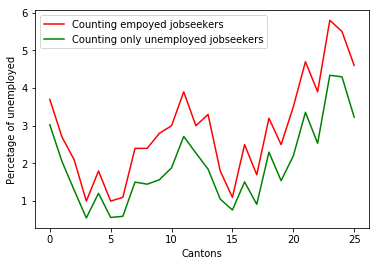

In [113]:
# we will drop the last row as it is overall result
# MAYBE TRY TO SEE what is the deviation of each canton?
# or try to plot the difference among cantons for the two different ways of calculating the unemployment rate
# because here on the image the shading is more or less the same, lets some some more truthful insight
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
x = [i for i in range(len(switzerland_df))]
ax.plot(x, switzerland_df.unemployment_rate, 'r')
ax.plot(x, switzerland_df.unemployed_jobseekers_unemployment_rate, 'g')
ax.set_ylabel("Percetage of unemployed")
ax.set_xlabel("Cantons")
ax.legend(["Counting empoyed jobseekers", "Counting only unemployed jobseekers"])
fig


In [ ]:

#print (switzerland_unemployed_df)
#switzerland_unemployed_df[['Kanton','Gesamt']]
#switzerland_unemployed_df
#switzerland_unemployed_df.reset_index(inplace=True)
#switzerland_unemployed_df.columns = pd.MultiIndex.from_tuples(df.columns)

#switzerland_unemployed_df.loc[1][:]
#switzerland_unemployed_df['level_1']
#switzerland_unemployed_df['2.1 Arbeitslosenquoten']

# Task 3